In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
#from sklearn.metrics import mean_squared_error
#from sklearn import metrics

In [36]:
print("Dataset:")
dataset=pd.read_csv('Lung_Cancer_Dataset.csv')
print(len(dataset))
print(dataset.head())

Dataset:
59
     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1


<AxesSubplot:>

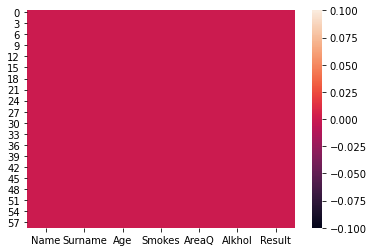

In [37]:
#checking whether dataset has null values
sns.heatmap(dataset.isnull())

In [38]:
dataset['Result'].value_counts()


0    31
1    28
Name: Result, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

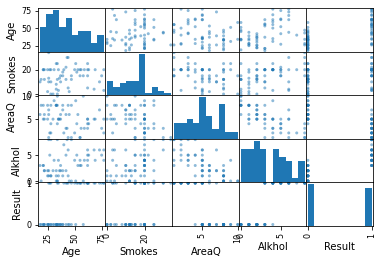

In [39]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
scatter_matrix(dataset)
pyplot.show

In [40]:
A=dataset[dataset.Result==1]
B=dataset[dataset.Result==0]

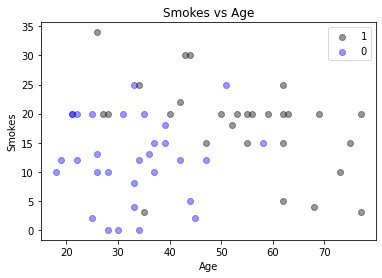

In [41]:
plt.scatter(A.Age ,A.Smokes , color="Black", label="1", alpha=0.4)
plt.scatter(B.Age ,B.Smokes, color="Blue", label="0",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.legend()
plt.title("Smokes vs Age")
plt.show()

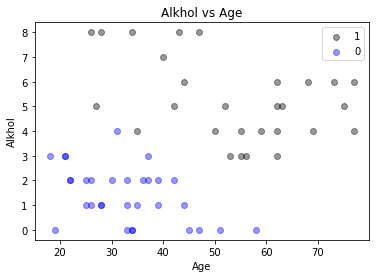

In [42]:
plt.scatter(A.Age, A.Alkhol, color="Black",label="1",alpha=0.4)
plt.scatter(B.Age, B.Alkhol, color="Blue",label="0",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Alkhol vs Age")
plt.show()

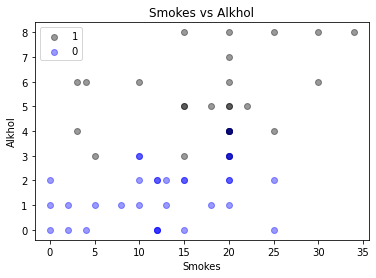

In [43]:
plt.scatter(A.Smokes, A.Alkhol, color="Black",label="1",alpha=0.4)
plt.scatter(B.Smokes, B.Alkhol, color="Blue",label="0",alpha=0.4)
plt.xlabel("Smokes")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Smokes vs Alkhol")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
#split dataset
x=dataset.iloc[:,3:5]
y=dataset.iloc[:,6]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [46]:
#feature Scaling
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# Logistic Regression


In [47]:

from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression()

# We train the model
logreg.fit(x_train, y_train)

# We predict target values
y_predict1 = logreg.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
logreg_cm=confusion_matrix(y_test,y_predict1)
print("Confusion Matrix:")
print(logreg_cm)

Confusion Matrix:
[[8 0]
 [1 3]]


In [49]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=logreg,X=x_train,y=y_train,cv=10)
print("accuracy is in percentage",format(accuracies.mean()*100))

accuracy is in percentage 82.0


# svm

In [50]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(x_train,y_train)
y_predict2 = sv.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix
sv_cm=confusion_matrix(y_test,y_predict2)
print("Confusion Matrix:")
print(sv_cm)

Confusion Matrix:
[[8 0]
 [1 3]]


In [52]:
from sklearn.model_selection import cross_val_score
accuraciess=cross_val_score(estimator=sv,X=x_train,y=y_train,cv=10)
print("accuracy is in percentage",format(accuraciess.mean()*100))

accuracy is in percentage 81.5


# K-Nearest Neighbor classification

In [53]:
from sklearn.neighbors import KNeighborsClassifier
kncc=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
kncc.fit(x_train, y_train)
y_predict3=kncc.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix
kncc_cm=confusion_matrix(y_test,y_predict3)
print("Confusion Matrix:")
print(kncc_cm)

Confusion Matrix:
[[7 1]
 [1 3]]


In [55]:
from sklearn.model_selection import cross_val_score
accuracies_kncc=cross_val_score(estimator=kncc,X=x_train,y=y_train,cv=10)
print("accuracy is in percentage",format(accuracies_kncc.mean()*100))

accuracy is in percentage 86.5


# Decision tree classification


In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_predict4 = dtc.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix
dtc_cm=confusion_matrix(y_test,y_predict4)
print("Confusion Matrix:")
print(dtc_cm)

Confusion Matrix:
[[5 3]
 [0 4]]


In [58]:
from sklearn.model_selection import cross_val_score
accuracies_dtc=cross_val_score(estimator=dtc,X=x_train,y=y_train,cv=10)
print("accuracy is in percentage",format(accuracies_dtc.mean()*100))

accuracy is in percentage 71.0


# Accuracies of all classification model overview
Logistic regression :82%
support vector machine:81%
K-nearest Neighbor classification:86%
Decision tree classification:75%

# The best model is K-Nearest Neighbor with 86% Accuracy
